# 4주차 Day3 Mission

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# 데이터 불러오기
titanic_df = pd.read_csv("train.csv")
titanic_df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

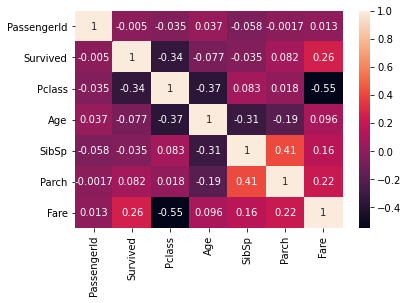

In [3]:
# 상관계수 확인하기
sns.heatmap(titanic_df.corr(), annot=True)

# Survived와 Fare의 상관계수가 0.26으로 양의 상관관계를 보임

### Survived + Fare

In [4]:
titanic_df.describe()['Fare']

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

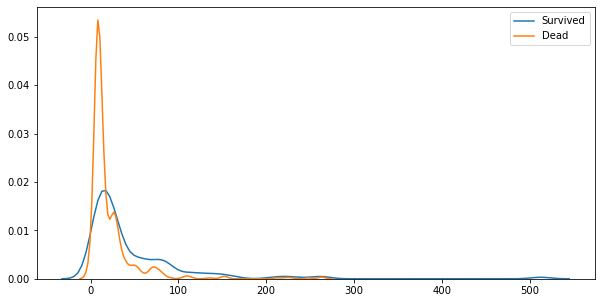

In [5]:
# survived와 fare의 경향성

# 2개의 그래프 동시에 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(data=titanic_df[titanic_df.Survived==1]['Fare'], ax=ax)
sns.kdeplot(data=titanic_df[titanic_df.Survived==0]['Fare'], ax=ax)

plt.legend(['Survived', 'Dead'])

plt.show()

## 요금을 더 많이 낸 경우에 생존률이 더 높은 것으로 보인다

### Survived + Parch

In [6]:
# 0부터 6까지의 값을 가짐
titanic_df.describe()['Parch']

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

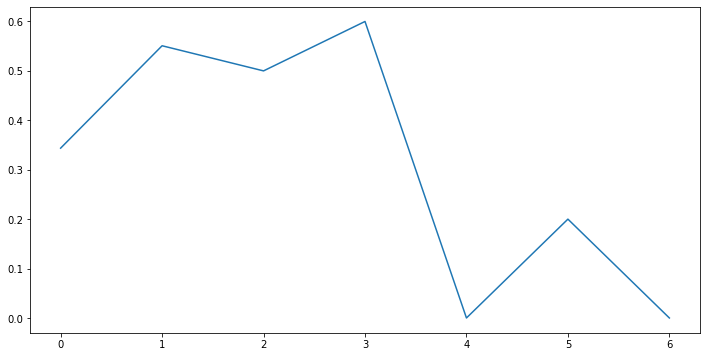

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(titanic_df[['Parch', 'Survived']].groupby(['Parch']).mean())

In [49]:
survived_count_by_parch = pd.DataFrame(titanic_df.groupby(['Parch', 'Survived']).PassengerId.count())
survived_count_by_parch = survived_count_by_parch.reset_index()
survived_count_by_parch_pivot = survived_count_by_parch.pivot(index='Parch', columns='Survived', values='PassengerId')
survived_count_by_parch_pivot = survived_count_by_parch_pivot.fillna(0)

In [51]:
survived_count_by_parch_pivot

Survived      0      1
Parch                 
0         445.0  233.0
1          53.0   65.0
2          40.0   40.0
3           2.0    3.0
4           4.0    0.0
5           4.0    1.0
6           1.0    0.0

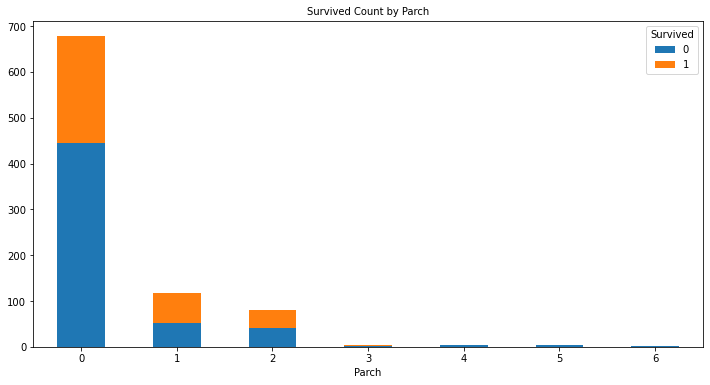

In [57]:
# Stacked Bar Chart로 비율을 한눈에 파악해보자
survived_count_by_parch_pivot.plot.bar(stacked=True, rot=0, figsize=(12, 6))
plt.title('Survived Count by Parch', fontsize=10)

plt.show()

## parch가 커질수록(동승한 부모, 자식이 많을수록) survived 비율이 낮은 것으로 보인다

### 2. Kaggle에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.
사용한 데이터셋: [Hotel booking demand](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

### 예약 취소와 관련된 feature를 탐색해보자!

In [29]:
# 데이터 불러오기
data = pd.read_csv('hotel_bookings.csv')
data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [4]:
data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [12]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

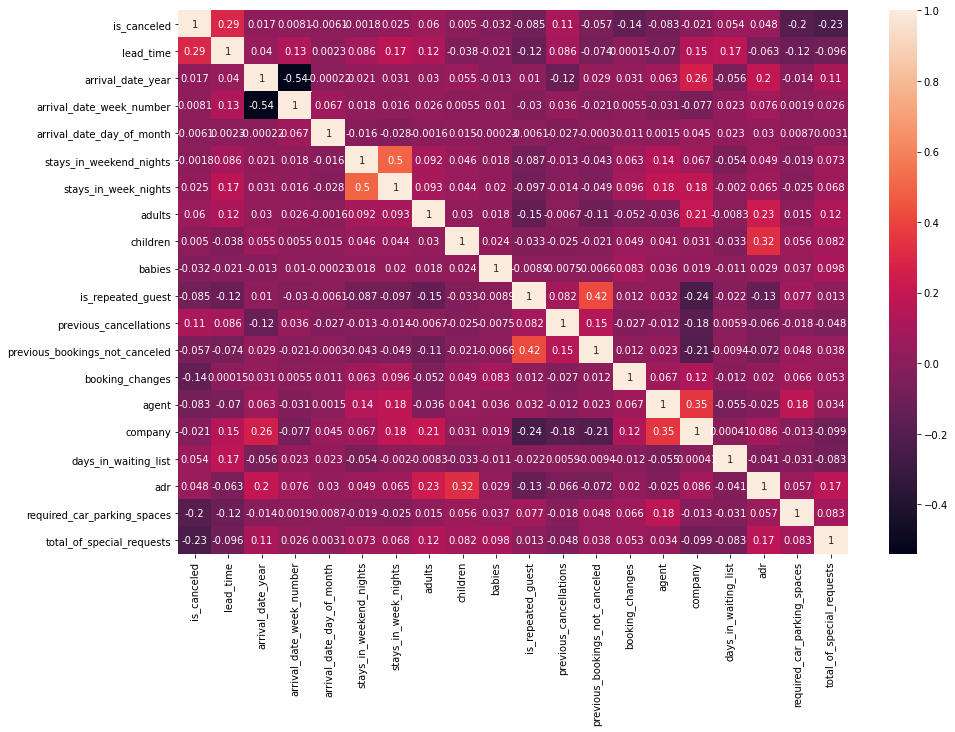

In [5]:
# 상관계수 확인하기
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

## is_calceled와 상관관계를 보이는 column으로 lead_time, required_car_parking_spaces, total_of_special_requests 등이 있다

### I. is_canceled + lead_time
- lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- 가설: lead time이 클수록 예약 취소율이 높을 것이다.

In [30]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [22]:
data.pivot(columns='is_canceled', values='lead_time').iplot(kind='box', yTitle='Lead Time', title='Lead Time Distribution by Cancellation')

## lead time이 길수록 취소율이 높은 경향이 있는 것으로 보인다.

### II. is_canceled + total_of_special_requests
- 가설: total_of_special_requests가 많을 수록 예약 취소율이 낮을 것이다.

In [42]:
temp_df = data[['is_canceled', 'total_of_special_requests']]

In [44]:
temp_df[temp_df['is_canceled']==1].groupby(['total_of_special_requests']).count()

is_canceled
total_of_special_requests             
0                                33556
1                                 7318
2                                 2866
3                                  446
4                                   36
5                                    2

In [49]:
# 예약을 취소한 사람들의 # of special requests 비율
df = temp_df[temp_df['is_canceled']==1].groupby(['total_of_special_requests']).count().reset_index()

labels = df['total_of_special_requests'].tolist()
values = df['is_canceled'].tolist()

fig = px.pie(df, values=values, names=labels)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig['layout'].update(height=500, width=700, title='# of Special Requests (Canceled)', boxmode='group')
fig.show()


In [50]:
# 예약을 취소하지 않은 사람들의 # of special requests 비율
df = temp_df[temp_df['is_canceled']==0].groupby(['total_of_special_requests']).count().reset_index()

labels = df['total_of_special_requests'].tolist()
values = df['is_canceled'].tolist()

fig = px.pie(df, values=values, names=labels)
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig['layout'].update(height=500, width=700, title='# of Special Requests (Not Canceled)', boxmode='group')
fig.show()

## 예약을 취소하지 않은 사람 중 
## special requests가 한 건이라도 있는 경우의 비율이 더 높은 것으로 보인다.

### III. is_canceled + customer_type
- 가설: customer_type에 따라 예약취소율이 다를 것이다.
- Contract: when the booking has an allotment or other type of contract associated to it
- Group: when the booking is associated to a group
- Transient: when the booking is not part of a group or contract, and is not associated to other transient booking
- Transient-party: when the booking is transient, but is associated to at least other transient booking

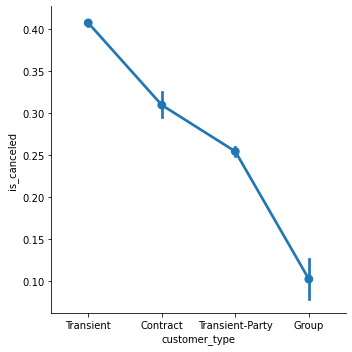

In [52]:
sns.catplot(x='customer_type', y='is_canceled', kind='point', data=data)
plt.show()

## 여럿보다는 개인이 예약할 때, 단기 체류일 때 취소율이 높은 것으로 보인다.